In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *





process_gen_modes=[ "gsm_samples1_1","gsm_samples1_2","gsm_samples1_3", "gsm_samples2"]

dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)
examples_df = pd.concat(list(dfs_by_model.values()))



# processGens=ProcessGens()
# do_norm_analysis=True
# processGens.init_with_mode(process_gen_modes)
# root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()
# examples_df, completions_df=get_dfs(processGens)

# #self-instruct and vicuna

# dfs_by_model={}

# for model_name in examples_df['model'].unique():
#     filtered_df = examples_df[examples_df["model"]==model_name]
#     dfs_by_model[model_name]=filtered_df

# all_dfs_by_model=dfs_by_model
# if(len(models)>1):
    # all_dfs_by_model["all_models"]=examples_df

/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


In [2]:
print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# instanceGeneration=get_first(processGens.first_run_instances)
print(examples_df.head(2))
print("num examples" ,len(examples_df))
print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

print(dfs_by_model.keys())

	 root_folder: snellius_copies/helm_output 
 	 num_beams_list [1] 
 	 models: ['Qwen_Qwen3_8B'] 
 	 custom_metrics['final_num_exact_match', 'example_exact_match']
 	 task_names ['gsm_'] 
 	 suite_name sample_100_eval_500_first_inst_0 
 	 instance_metrics []
   beam_num task_name                             model  example_idx  rank  \
0         1      gsm_  meta_llama_Llama_3.1_8B_Instruct            0   100   
1         1      gsm_  meta_llama_Llama_3.1_8B_Instruct            1    99   

                             suite  instanceID  \
0  sample_100_eval_20_first_inst_0           0   
1  sample_100_eval_20_first_inst_0           0   

                                                text  completion_length  \
0                                       90<|eot_id|>                 12   
1  It took 30 minutes to cook the rice. It took 3...                304   

   output_logprob isCompletion  final_num_exact_match  example_exact_match  
0      -28.083370         True                      0

figsize is (10, 10)
model_name is meta_llama_Llama_3.1_8B_Instruct
model_name is Qwen_Qwen3_8B
model_name is meta_llama_Llama_3.1_8B_Instruct
model_name is Qwen_Qwen3_8B


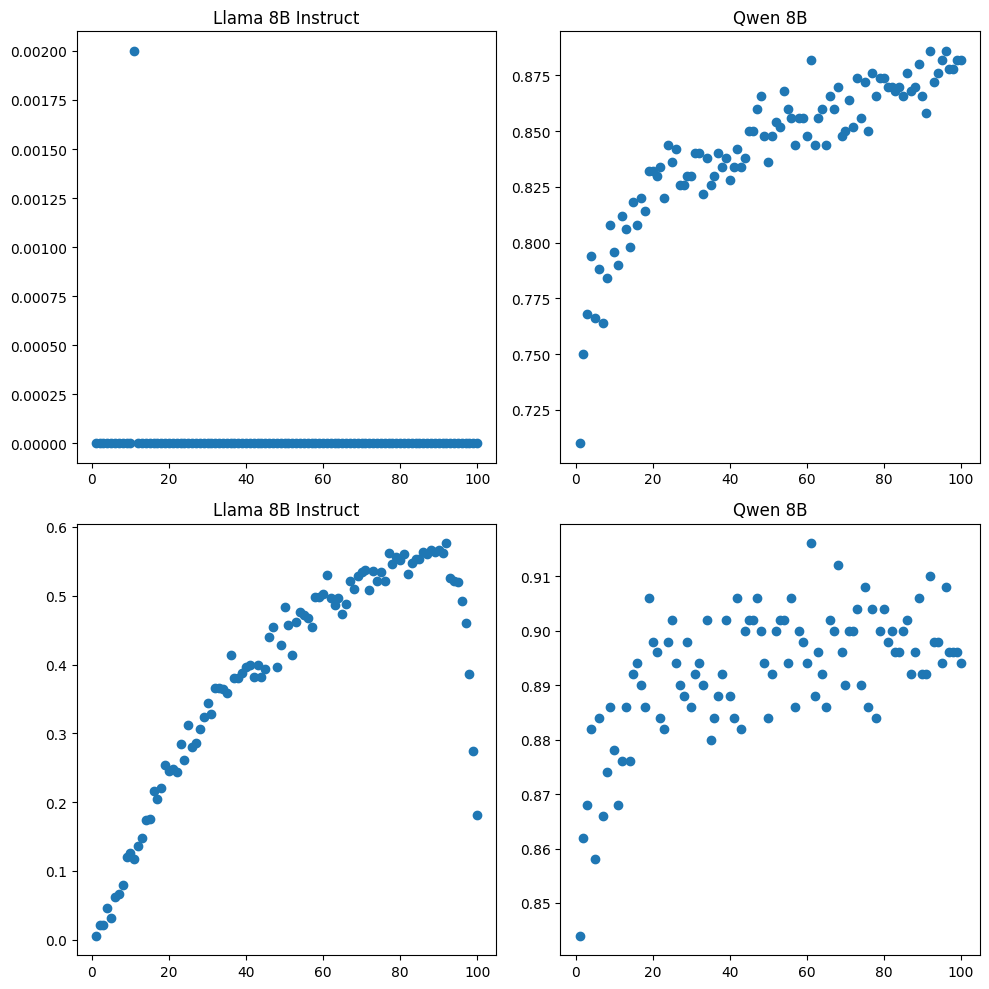

In [3]:

def special_qualitative_plots(compare_metrics, models_vector, dfs_by_model, figsize=None):
    

    nrows=len(compare_metrics)
    ncols=len(models_vector)

    if figsize is None:
        figsize=(nrows*5, ncols*5)
        print(f"figsize is {figsize}")
    _, axes=plt.subplots(nrows=nrows, ncols= ncols, figsize=figsize)
    
    for row, compare_metric in enumerate(compare_metrics):
        for col in range(ncols):
            ax=axes[row][col]
            if col < len(models_vector):
                model_name=models_vector[col]
                print(f"model_name is {model_name}")

                filtered_df=dfs_by_model[model_name]
                def calculate_title():
                    readable_model=get_model_details(model_name)['name']
                    return f"{readable_model}: {suptitle}" if ax is None else readable_model
                # plot by rank within sentence
                suptitle="Grouped by rank within sentence"
                ax=plot_grouped(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, error_bar=False)  
                ax.set_xlabel(None)
                ax.set_ylabel(None)
            else:
                ax.axis('off')

        
    plt.tight_layout()


compare_metrics=["example_exact_match","final_num_exact_match"]

models_vector=["meta_llama_Llama_3.1_8B_Instruct","Qwen_Qwen3_8B"]
special_qualitative_plots(compare_metrics=compare_metrics, models_vector=models_vector, dfs_by_model=dfs_by_model, figsize=None)